# 2nd Hospital Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("F:/COLLEGE/6TH SEMESTER/Predictive Analysis/Project/Dataset/sepsis_Data2.csv")
dataset=dataset.drop("Unnamed: 0",axis=1)
dataset.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,2,0
1,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,3,0
2,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,4,0
3,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,5,0
4,94.0,100.0,36.22,194.0,116.0,66.0,14.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,6,0


In [3]:
dataset.shape

(58376, 41)

In [4]:
dataset.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,58376.000000,58376.000000,58376.000000,58376.000000,58376.000000,58376.000000,58376.000000,58376.0,58376.000000,58376.000000,...,58376.000000,58376.000000,58376.00000,58376.000000,58376.000000,58376.000000,58376.000000,58376.000000,58376.000000,58376.000000
mean,85.045553,96.971238,36.721042,119.677133,78.828130,41.045126,18.768214,0.0,0.044231,24.224861,...,11.418421,52.279459,205.16834,62.973074,0.583116,0.274531,0.255687,-46.696523,28.553584,0.022372
std,17.166574,5.316696,2.969187,24.790090,15.239268,30.558140,5.469252,0.0,3.372358,5.148195,...,6.530127,136.887448,111.19092,16.578110,0.493047,0.446281,0.436251,132.489895,29.297463,0.147892
min,22.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,-32.000000,0.000000,...,0.000000,0.000000,0.00000,18.110000,0.000000,0.000000,0.000000,-3269.100000,2.000000,0.000000
25%,73.000000,96.000000,36.440000,104.000000,68.330000,0.000000,15.000000,0.0,0.000000,22.000000,...,7.700000,0.000000,134.75000,51.920000,0.000000,0.000000,0.000000,-31.860000,12.000000,0.000000
50%,84.000000,98.000000,36.900000,118.000000,77.000000,52.000000,18.000000,0.0,0.000000,24.000000,...,10.500000,0.000000,188.00000,65.980000,1.000000,0.000000,0.000000,-1.690000,22.000000,0.000000
75%,96.000000,99.000000,37.400000,135.000000,87.670000,63.000000,22.000000,0.0,1.000000,27.000000,...,13.800000,0.000000,252.00000,75.840000,1.000000,1.000000,1.000000,-0.020000,36.000000,0.000000
max,183.000000,100.000000,41.170000,229.000000,294.000000,173.000000,67.000000,0.0,21.000000,52.000000,...,128.700000,954.000000,970.00000,88.980000,1.000000,1.000000,1.000000,14.650000,265.000000,1.000000


In [5]:
dataset.isnull().sum()

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
Gender              0
Unit1               0
Unit2               0
HospAdmTime         0
ICULOS              0
SepsisLabel         0
dtype: int64

In [6]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

In [7]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=57070,random_state=123)

In [8]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [9]:
df_upsampled.SepsisLabel.value_counts()

0    57070
1    57070
Name: SepsisLabel, dtype: int64

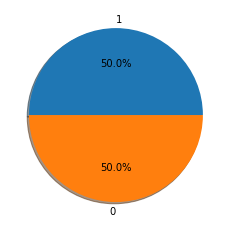

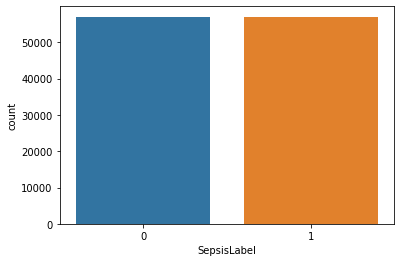

In [10]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(x=df_upsampled['SepsisLabel'], label="Count")
plt.show()

In [11]:
X = df_upsampled[df_upsampled.columns[0:40]].values

In [12]:
Y = df_upsampled[df_upsampled.columns[40:]].values


In [13]:
print("sepsis dimensions : {}".format(df_upsampled.shape))

sepsis dimensions : (114140, 41)


In [14]:
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (114140, 40)


In [15]:
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (114140, 1)


In [16]:
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(91312, 40)
Testing data dimensions :(22828, 40)


In [19]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neural_network import MLPClassifier

In [20]:
clf=MLPClassifier(
    activation='tanh',
    solver='lbfgs',
    early_stopping=False,
    hidden_layer_sizes=(40,10,10,10,10, 2),
    random_state=1,
    batch_size='auto',
    max_iter=100,
    learning_rate_init=1e-5,
    tol=1e-4,)

In [21]:
clf.fit(X_train, Y_train)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 10, 10, 10, 10, 2),
              learning_rate_init=1e-05, max_iter=100, random_state=1,
              solver='lbfgs')

In [22]:
import pickle

In [23]:
# save the model to disk
filename = "F:/COLLEGE/6TH SEMESTER/Predictive Analysis/Projectfinalized_model2.sav"
pickle.dump(clf, open(filename, 'wb'))

In [24]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8843963553530751


In [25]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

In [26]:
predicted = loaded_model.predict(X_test)
print(predicted.shape)
print(Y_test.shape)
print(confusion_matrix(Y_test,predicted))

(22828,)
(22828,)
[[ 9553  1881]
 [  758 10636]]


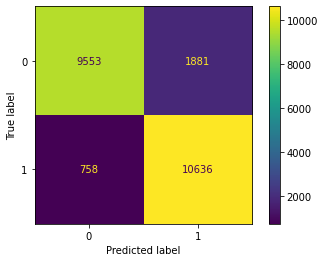

In [27]:
cm=confusion_matrix(Y_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [32]:
df_test =pd.read_csv('F:/COLLEGE/6TH SEMESTER/Predictive Analysis/Project/Dataset/test_D.csv')
df_test=df_test.drop("Unnamed: 0",axis=1)
dataset.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,2,0
1,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,3,0
2,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,4,0
3,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,5,0
4,94.0,100.0,36.22,194.0,116.0,66.0,14.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,6,0


In [33]:
X2_test = df_test[df_test.columns[0:40]].values


In [34]:
Y2_test = df_test[df_test.columns[40:]].values
Y2_test
labelencoder_Y = preprocessing.LabelEncoder()
Y2_test = labelencoder_Y.fit_transform(Y2_test)
Y2_test

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
print("sepsis dimensions without label : {}".format(X2_test.shape))

sepsis dimensions without label : (25210, 40)


In [36]:
print("sepsis dimensions without label : {}".format(Y2_test.shape))

sepsis dimensions without label : (25210,)


MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 10, 10, 10, 10, 2),
              learning_rate_init=1e-05, max_iter=100, random_state=1,
              solver='lbfgs')


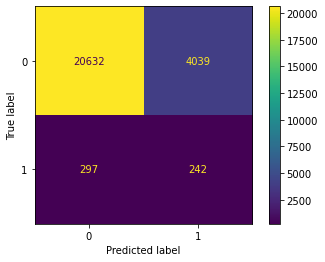

In [37]:
loaded_model = pickle.load(open('F:/COLLEGE/6TH SEMESTER/Predictive Analysis/Projectfinalized_model2.sav', 'rb'))
print(loaded_model)
predicted = loaded_model.predict(X2_test)
cm=confusion_matrix(Y2_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=loaded_model.classes_)
disp.plot()
plt.show()

In [38]:
result = loaded_model.score(X2_test, Y2_test)
print(result)

0.8280047600158668


In [39]:
from sklearn.metrics import precision_score, classification_report,average_precision_score, accuracy_score, balanced_accuracy_score, precision_recall_curve, f1_score, auc, roc_curve

In [40]:
import numpy as np
def predictors_labels_allocator(df):
    col_names = df.columns
    X = np.array(df[col_names[:-1]].values)
    y = df[col_names[-1]].values
    
    return X, y

In [41]:
Xtr, ytr = predictors_labels_allocator(dataset)  


In [42]:
yhat_probas = loaded_model.predict_proba(X_test)


In [43]:
pip install plot-metric

Note: you may need to restart the kernel to use updated packages.


In [44]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import random
from plot_metric.functions import BinaryClassification

In [45]:
def plot_ROC(y_test, y_score, n_classes=2):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr['positive'], tpr['positive'], _ = roc_curve(y_test, y_score)
    roc_auc['positive'] = auc(fpr['positive'], tpr['positive'])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr['positive'], tpr['positive'], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['positive'])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [46]:
Y_test

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [47]:
X_test

array([[ 9.9000e+01,  9.4000e+01,  3.7560e+01, ...,  0.0000e+00,
        -2.0000e-02,  2.0000e+01],
       [ 6.8000e+01,  1.0000e+02,  3.5940e+01, ...,  0.0000e+00,
        -6.5700e+00,  1.4000e+01],
       [ 6.2000e+01,  9.6000e+01,  3.5390e+01, ...,  0.0000e+00,
        -2.6118e+02,  2.8000e+01],
       ...,
       [ 8.6000e+01,  9.7000e+01,  3.6890e+01, ...,  0.0000e+00,
        -1.4006e+02,  3.0000e+00],
       [ 9.6000e+01,  1.0000e+02,  3.6670e+01, ...,  0.0000e+00,
        -3.0000e-02,  1.9200e+02],
       [ 1.0700e+02,  9.6000e+01,  3.8110e+01, ...,  0.0000e+00,
        -1.0000e-02,  5.5000e+01]])

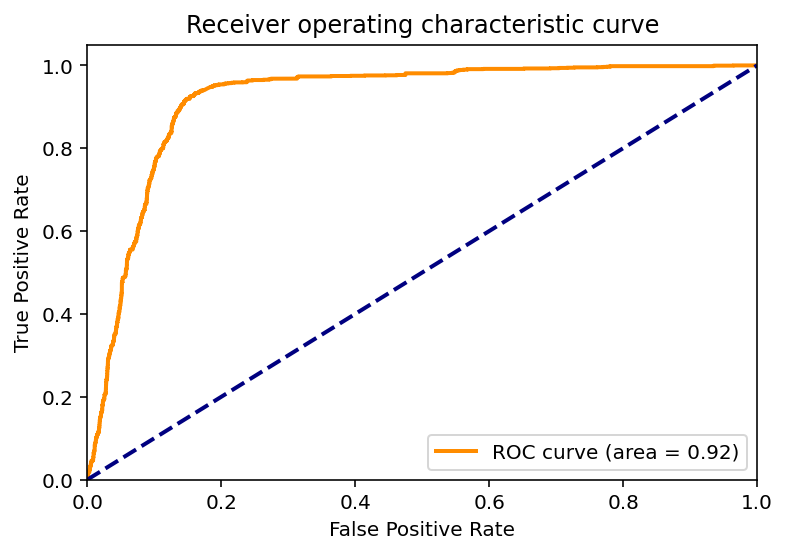

In [48]:
plot_ROC(Y_test,yhat_probas[:,1])